<a href="https://colab.research.google.com/github/mariamloukili/Prediction-using-Supervised-Machine-Learning-Task-1-SparkFoundation/blob/main/Prediction_using_Supervised_Machine_Learning_Task_1_Spark_Foundation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Prediction using Supervised Machine Learning**

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables

#### **Simple Linear Regression**

In this task we will Predict the percentage of marks that a student is expected to score based upon the number of hours they studied using Simple Linear Regression.

Data can be found at http://bit.ly/w-data

**Author : Mariam Loukili**

In [1]:
# Import the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load the data from the link, exist in a CSV file
link = "http://bit.ly/w-data"
data = pd.read_csv(link)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


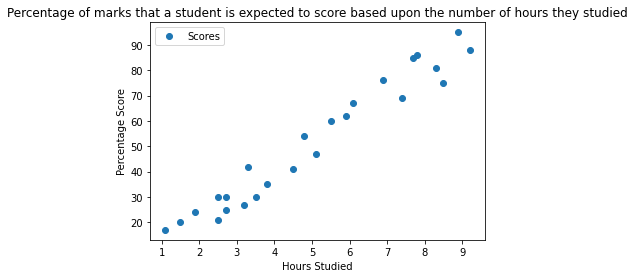

In [10]:
# Visualizing the distribution of scores
data.plot(x='Hours' ,y='Scores' , style="o")
plt.title("Percentage of marks that a student is expected to score based upon the number of hours they studied")
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score') 
plt.show()

###### ***From the graph shown above, we can clearly observe that there is a positive linear relationship between the number of hours of study and the percentage of the score.***

### **Data Preparation**   
Divide the data into inputs called attributes and outputs called labels

In [29]:
X = data.iloc[: , :-1].values
y = data.iloc[: , -1].values

So now we have our attributes and labels. Next step is to split this data into training and test sets. We'll do this by using Hold-out method

In [31]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

### **Training the Model**
We have split our data into training and testing sets, and it is finally time to train our algorithm.

In [32]:
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
classifier.fit(X_train , y_train)
print("The model has been successfully trained")

The model has been successfully trained


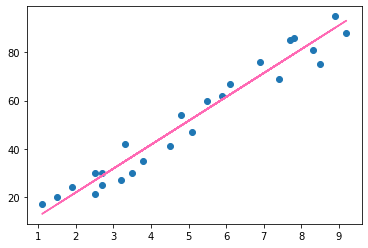

In [42]:
# Plotting the regression line
line = classifier.coef_*X+classifier.intercept_

# Plotting for the test data
plt.scatter(X,y)
plt.plot(X, line, color = 'hotpink');
plt.show()

### **Predicting with test data**
Let's make some prediction sith test data

In [63]:
# Predicting the scores
print(X_test)
y_pred = classifier.predict(X_test)

# Comparing Actual vs Predicted
pd.DataFrame({'Real' : y_test , 'Predicted' : y_pred})

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


,Real,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [61]:
# Let's test with a specific value
hour = 9.25
pred_score = classifier.predict([[hour]])
print(f"No of Hours = {hour}")
print(f"Predicted Score = {round(pred_score[0],2)}")

No of Hours = 9.25
Predicted Score = 93.69


### **Evaluate the model**

There are two ways to evaluate the performance of a Linear Regression model : 
- Calculate Mean Absolute Error
- Calculate Mean Squared Error

In [75]:
from sklearn import metrics
print('Mean Absolute Error:' ,metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:' ,metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
